In [2]:
from google.colab import auth
auth.authenticate_user()
print('User Authenticated')
project_id = 'causefinder'
%load_ext google.colab.data_table

User Authenticated


In [3]:
from google.cloud import bigquery

client = bigquery.Client(project=project_id)

rawData = client.query('''SELECT * FROM `causefinder.TripDB.ProcessedTable` where routeId='44' or routeId='38' or routeId='4' ''').to_dataframe()


In [4]:
from pandas import DataFrame
df=DataFrame(rawData)
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

sns.set()

df=rawData.copy(deep=True)
df.head(10)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,RouteId,DestinationId,StopId,VisitNumber,Latitude,Longitude,DayOfWeek,ArrivalDelayPrediction,DelayStatus,DistanceInMeters,EncodedAddress,EncodedLocation,Hour,TimeOfDay,VehicleDirection,PredictedDelayStatus
0,44,7571,205,74,53.381411,-6.245341,4,8,Late,21561.543081,323,926,LateMorning,3,1,4
1,44,7571,210,79,53.387527,-6.248318,4,13,VeryLate,22268.919642,41,888,LateAfternoon,5,1,5
2,44,7571,19,68,53.367138,-6.255493,2,-4,Early,20200.995499,11,614,EarlyAfternoon,4,1,2
3,44,7571,204,73,53.379587,-6.246639,4,0,Ontime,21384.750499,323,950,EarlyAfternoon,4,1,3
4,44,7571,209,78,53.38733,-6.245866,5,0,Ontime,22210.040848,41,144,EarlyEvening,6,1,3
5,44,7571,21,69,53.370092,-6.254291,4,15,VeryLate,20494.338417,11,472,LateMorning,3,1,5
6,44,7571,205,74,53.381411,-6.245341,6,2,Ontime,21561.543081,323,926,LateAfternoon,5,1,3
7,44,7571,203,72,53.376396,-6.24993,3,10,Late,21094.429006,323,908,LateMorning,3,1,4
8,44,7571,206,75,53.383527,-6.247464,6,6,Ontime,21823.309252,51,926,LateAfternoon,5,1,3
9,44,7571,1643,80,53.384806,-6.250997,3,0,Ontime,22017.780880,246,443,EarlyMorning,2,1,3


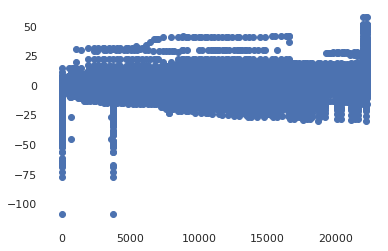

In [ ]:
plt.scatter(df['DistanceInMeters'], df['ArrivalDelayPrediction'])
plt.show()

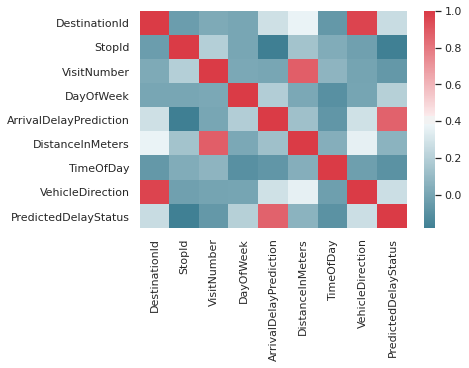

In [ ]:
sns.set(style='white')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(),cmap=cmap)

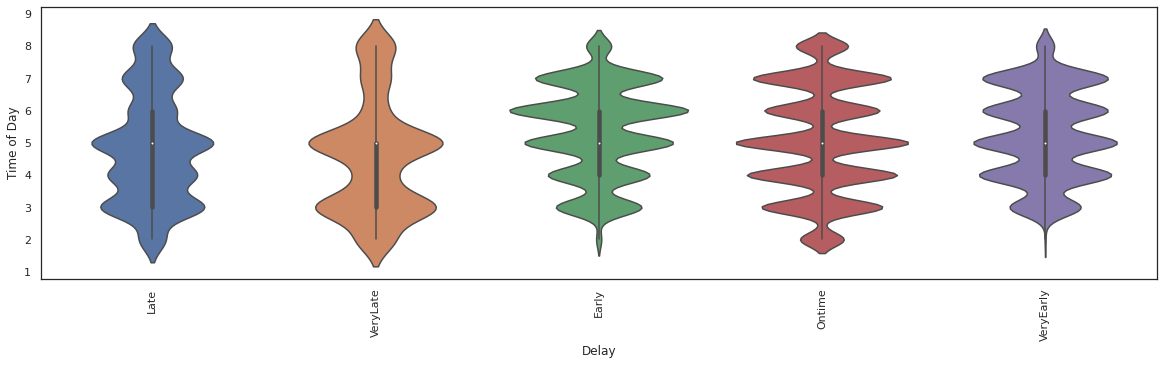

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.violinplot(x='DelayStatus', y='TimeOfDay', data=df)
ax.set_ylabel('Time of Day')
ax.set_xlabel('Delay')
label = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig = ax.get_figure()

In [ ]:
X = df[['StopId','DayOfWeek','DistanceInMeters','TimeOfDay','VehicleDirection','VisitNumber']]
y = df[['PredictedDelayStatus']]

In [ ]:
X.head()

,StopId,DayOfWeek,DistanceInMeters,TimeOfDay,VehicleDirection,VisitNumber
0,205,4,21561.543081,3,1,74
1,210,4,22268.919642,5,1,79
2,19,2,20200.995499,4,1,68
3,204,4,21384.750499,4,1,73
4,209,5,22210.040848,6,1,78


In [ ]:
def intDownCaster(col):
    return pd.to_numeric(X[col], downcast='integer')

for column in X:
    X[column]=intDownCaster(column)

print(X.dtypes)

StopId                int16
DayOfWeek              int8
DistanceInMeters    float64
TimeOfDay              int8
VehicleDirection       int8
VisitNumber            int8
dtype: object


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
from sklearn.model_selection import train_test_split
import random
random.seed(0)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
test_y['PredictedDelayStatus'].value_counts(normalize=True) * 100

3    86.039525
2     5.703921
4     4.455424
1     2.394623
5     1.406507
Name: PredictedDelayStatus, dtype: float64

In [ ]:
from fastai.conv_learner import *


In [ ]:
train_x.info

<bound method DataFrame.info of         StopId  DayOfWeek  ...  VehicleDirection  VisitNumber
187470     427          2  ...                 0           51
41971     3284          4  ...                 1           13
135432     194          4  ...                 1           37
189983     428          7  ...                 0           52
16102     3162          6  ...                 1            5
...        ...        ...  ...               ...          ...
30357      469          1  ...                 1            9
220814     323          6  ...                 1           60
17068      211          7  ...                 0            6
44146      473          6  ...                 1           13
208884    3115          6  ...                 0           57

[179735 rows x 6 columns]>

In [ ]:
train_y

,PredictedDelayStatus
211018,3
164967,3
158741,3
64342,3
189977,3
...,...
163617,3
10016,3
129622,4
9415,1


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential()
model.add(layers.Dense(units=6, activation='linear',input_dim = 6))
model.add(layers.Dense(units=14, activation='linear'))
# Apply linear activation function to hidden layer
# Generate output layer with 14 nodes
model.add(layers.Dense(units=1, activation='linear'))
# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [ ]:
model = Sequential()

model.add(Dense(32, input_dim=6, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(64, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(128, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(0.3))

model.add(Dense(512, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(1024, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(512, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(0.3))

model.add(Dense(512, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(1024, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(512, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(0.3))

model.add(Dense(128, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(64, activation="elu", kernel_initializer="he_normal"))
model.add(Dense(32, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dropout(0.3))

model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="SGD", loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
model_result = model.fit(x=train_x, y=train_y.values.ravel(), batch_size=100, epochs=50, validation_split=0.2, shuffle=True, verbose=2)

Epoch 1/50
1438/1438 - 77s - loss: nan - accuracy: 1.3909e-05 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/50
1438/1438 - 77s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/50
1438/1438 - 76s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/50
1438/1438 - 76s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/50
1438/1438 - 76s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/50
1438/1438 - 76s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/50
1438/1438 - 76s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 8/50
1438/1438 - 76s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 9/50
1438/1438 - 77s - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 10/50
1438/1438 - 77s - loss: nan - accuracy: 0.0

KeyboardInterrupt: ignored

In [ ]:
predict = model.predict_classes(test_x)

In [ ]:
# Train the model
num_epochs = 10
batch_size = 1745
history = model.fit(x=train_x, y=train_y.values.ravel(),
                    epochs=10)

Epoch 1/10
5617/5617 [==============================] - 6s 1ms/step - loss: 5048.4634 - accuracy: 0.0195
Epoch 2/10
5617/5617 [==============================] - 6s 1ms/step - loss: 57.8680 - accuracy: 0.0213
Epoch 3/10
5617/5617 [==============================] - 6s 1ms/step - loss: 43.8732 - accuracy: 0.0206
Epoch 4/10
5617/5617 [==============================] - 6s 1ms/step - loss: 48.0576 - accuracy: 0.0206
Epoch 5/10
5617/5617 [==============================] - 6s 1ms/step - loss: 40.2701 - accuracy: 0.0207
Epoch 6/10
5617/5617 [==============================] - 6s 1ms/step - loss: 33.7361 - accuracy: 0.0209
Epoch 7/10
5617/5617 [==============================] - 6s 1ms/step - loss: 32.9131 - accuracy: 0.0202
Epoch 8/10
5617/5617 [==============================] - 6s 1ms/step - loss: 26.7634 - accuracy: 0.0203
Epoch 9/10
5617/5617 [==============================] - 6s 1ms/step - loss: 20.9190 - accuracy: 0.0198
Epoch 10/10
5617/5617 [==============================] - 6s 1ms/step - 

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 11, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
classifier.add(Dense(units = 11, activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(train_x, train_y, batch_size = 10, epochs = 100)

Epoch 1/100
17974/17974 [==============================] - 21s 1ms/step - loss: -2308857088.0000 - accuracy: 0.0240
Epoch 2/100
17974/17974 [==============================] - 20s 1ms/step - loss: -25058076672.0000 - accuracy: 0.0240
Epoch 3/100
17974/17974 [==============================] - 22s 1ms/step - loss: -93652680704.0000 - accuracy: 0.0240
Epoch 4/100
17974/17974 [==============================] - 20s 1ms/step - loss: -231841349632.0000 - accuracy: 0.0240
Epoch 5/100
17974/17974 [==============================] - 20s 1ms/step - loss: -463821832192.0000 - accuracy: 0.0240
Epoch 6/100
17974/17974 [==============================] - 24s 1ms/step - loss: -813281509376.0000 - accuracy: 0.0240
Epoch 7/100
17974/17974 [==============================] - 21s 1ms/step - loss: -1302216310784.0000 - accuracy: 0.0240
Epoch 8/100
17974/17974 [==============================] - 20s 1ms/step - loss: -1954932850688.0000 - accuracy: 0.0240
Epoch 9/100
17974/17974 [==============================] -

In [ ]:
from sklearn import metrics
import xgboost as xgb
gbm_all = xgb.XGBClassifier(max_depth=10,objective="multi:softmax")
fit_model = gbm_all.fit(train_x, train_y.ravel())
y_pred=gbm_all.predict(test_x)
print ("Accuracy :: ", metrics.accuracy_score(test_y,y_pred))
cm=confusion_matrix(test_y, y_pred)
TP = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[1][1]
print('True Positive ',TP,'False Positive',FP,'False Negative',FN,'True Negative',TN)

Accuracy ::  0.8694307206124539
True Positive  462 False Positive 96 False Negative 87 True Negative 337


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization


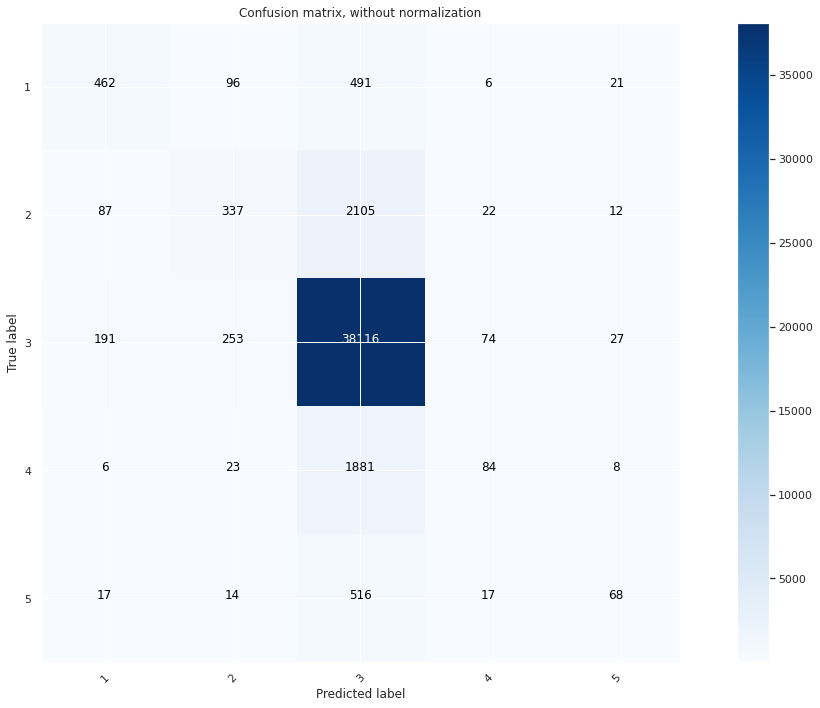

In [ ]:
cnf_matrix = confusion_matrix(test_y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(16,10))
plot_confusion_matrix(cnf_matrix, classes=['1', '2', '3','4','5'],
                      title='Confusion matrix, without normalization')

In [ ]:
from sklearn import metrics
print(metrics.classification_report(test_y, y_pred, digits=3))

              precision    recall  f1-score   support

           1      0.606     0.429     0.502      1076
           2      0.466     0.131     0.205      2563
           3      0.884     0.986     0.932     38661
           4      0.414     0.042     0.076      2002
           5      0.500     0.108     0.177       632

    accuracy                          0.869     44934
   macro avg      0.574     0.339     0.379     44934
weighted avg      0.827     0.869     0.832     44934



In [ ]:
cm

array([[  462,    96,   491,     6,    21],
       [   87,   337,  2105,    22,    12],
       [  191,   253, 38116,    74,    27],
       [    6,    23,  1881,    84,     8],
       [   17,    14,   516,    17,    68]])

In [ ]:
test_y.info

AttributeError: ignored

In [ ]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
model = xgb.XGBClassifier(max_depth=10,objective="multi:softmax")

learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(train_x, train_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: -0.403032 using {'learning_rate': 0.1}
-1.590999 (0.000029) with: {'learning_rate': 0.0001}
-1.442835 (0.000258) with: {'learning_rate': 0.001}
-0.744710 (0.001205) with: {'learning_rate': 0.01}
-0.403032 (0.002695) with: {'learning_rate': 0.1}
-0.417436 (0.003029) with: {'learning_rate': 0.2}
-0.432394 (0.003197) with: {'learning_rate': 0.3}


NameError: ignored

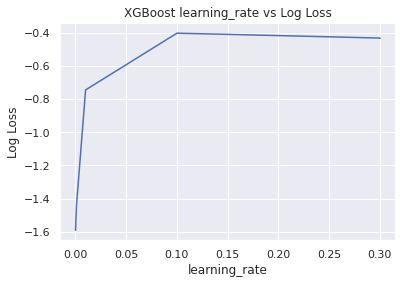

In [ ]:
# plot
from matplotlib import pyplot
pyplot.errorbar(learning_rate, means, yerr=stds)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('learning_rate.png')

In [ ]:
from sklearn import linear_model
from sklearn import metrics
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='sag',max_iter = 4000).fit(train_x, train_y.values.ravel())
print ("Accuracy :: ", metrics.accuracy_score(test_y, mul_lr.predict(test_x)))

cm=confusion_matrix(test_y, mul_lr.predict(test_x))
cm

Accuracy ::  0.8567009391552054


array([[   27,   105,   944,     0,     0],
       [   12,   106,  2445,     0,     0],
       [  106,   193, 38362,     0,     0],
       [    3,    12,  1987,     0,     0],
       [    1,     8,   623,     0,     0]])

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
params = dict(solver=solver_list)
log_reg = linear_model.LogisticRegression(C=1, n_jobs=-1, random_state=34)
clf = GridSearchCV(log_reg, params, cv=5)
clf.fit(train_x, train_y.values.ravel())
scores = clf.cv_results_['mean_test_score']

for score, solver in zip(scores, solver_list):
    print(f"  {solver} {score:.3f}" )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/

  liblinear 0.858
  newton-cg 0.859
  lbfgs 0.856
  sag 0.860
  saga 0.860


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y) 
  
# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_train.values.ravel()) 
dtree_predictions = dtree_model.predict(X_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, dtree_predictions) 
print ("Accuracy :: ", metrics.accuracy_score(test_y, dtree_model.predict(test_x)))

Accuracy ::  0.746829208225588


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y) 
  
# training a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(max_depth = 10).fit(X_train, y_train) 
rf_predictions = rf.predict(X_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, rf_predictions) 
print ("Accuracy :: ", metrics.accuracy_score(test_y, rf.predict(test_x)))

Accuracy ::  0.7293436768870829


In [ ]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train.values.ravel()) 
gnb_predictions = gnb.predict(X_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 

print ("Accuracy :: ", metrics.accuracy_score(test_y, gnb.predict(test_x)))

Accuracy ::  0.6426548454623815


In [ ]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train, y_train.values.ravel()) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 

print ("Accuracy :: ", metrics.accuracy_score(test_y, knn.predict(test_x)))

Accuracy ::  0.7114887329146656


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(train_x, train_y.values.ravel())
clf.predict(test_x)

print ("Accuracy :: ", metrics.accuracy_score(test_y, clf.predict(test_x)))
print(confusion_matrix(x_test, x_pred))

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
# from sklearn import svm
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
import xgboost as xgb

models = [KNeighborsClassifier(n_neighbors = 10), 
          GaussianNB(),
          DecisionTreeClassifier(max_depth = 10),
          RandomForestClassifier(max_depth = 10),
          xgb.XGBClassifier(max_depth=10,objective="multi:softmax",learning_rate=0.1),
          LogisticRegression(multi_class='multinomial', solver='sag',max_iter = 4000)]
          # svm.SVC(kernel='linear', C = 1.0)]

model_names = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest Classifier', 'Random Forest Regressor','XG Boost Classifier','LogisticRegression']

accuracy = []
precision_delay = []
recall_delay = []
f1_delay = []

## Go through the models and find the scores
for model in models:
    model.fit(train_x, train_y.values.ravel())
    y_hat = model.predict(test_x)
    
    accuracy.append( accuracy_score(test_y, y_hat) )
    precision_delay.append( precision_score(test_y, y_hat, pos_label=1,average='macro') )
    recall_delay.append( recall_score(test_y, y_hat, pos_label=1,average='macro'))
    f1_delay.append( f1_score(test_y, y_hat, pos_label=1,average='macro') )

accuracy_df = pd.DataFrame({'accuracy':accuracy, 'precision-delay':precision_delay,
                            'recall-delay':recall_delay, 'f1-delay':f1_delay})

model_names_x = ['KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest','XG Boost Classifier','Logistic Regression']
accuracy_df.set_index([model_names_x])

In [ ]:
pip install kmodes

In [ ]:
X = df.drop('DelayStatus', 1)
y = df[['DelayStatus']]

In [ ]:
df.head()

In [ ]:
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style

kproto = KPrototypes(n_clusters=15, init='Cao', verbose=2)
clusters = kproto.fit_predict(X, y)
# Print cluster centroids of the trained model.
print(kproto.cluster_centroids_)
# Print training statistics
print(kproto.cost_)
print(kproto.n_iter_)
for s, c in zip(syms, clusters):
    print("Result: {}, cluster:{}".format(s, c))
# Plot the results
for i in set(kproto.labels_):
    index = kproto.labels_ == i
    plt.plot(X[index, 0], X[index, 1], 'o')
    plt.suptitle('Data points categorized with category score', fontsize=18)
    plt.xlabel('Category Score', fontsize=16)
    plt.ylabel('Category Type', fontsize=16)
plt.show()
# Clustered result
fig1, ax3 = plt.subplots()
scatter = ax3.scatter(syms, clusters, c=clusters, s=50)
ax3.set_xlabel('Data points')
ax3.set_ylabel('Cluster')
plt.colorbar(scatter)
ax3.set_title('Data points classifed according to known centers')
plt.show()
result = zip(syms, kproto.labels_)
sortedR = sorted(result, key=lambda x: x[1])
print(sortedR)

In [ ]:
X = df.drop('DelayStatus', 1)
X = X.drop('Hour', 1)
y = df[['DelayStatus']]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

regressor = LinearRegression(fit_intercept=True,normalize=True, copy_X=True)  
regressor.fit(train_x, train_y)
y_pred = regressor.predict(test_x)
regressor.score(test_x,test_y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
regr.predict(test_x)
regr.score(test_x,test_y)

In [ ]:
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
sns.scatterplot(
    x='DistanceInMeters',
    y='DelayStatus',
    data=X_test.join(y_test, how='outer')
)

In [ ]:
plt.scatter(
    X_test['DistanceInMeters'],
    X_test['ArrivalDelayPrediction'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)

In [5]:
cluster_data=df[(df['ArrivalDelayPrediction'] < 15)]

In [6]:
cluster_data=cluster_data[(cluster_data['ArrivalDelayPrediction'] > -15)]

Text(0, 0.5, 'Flights')

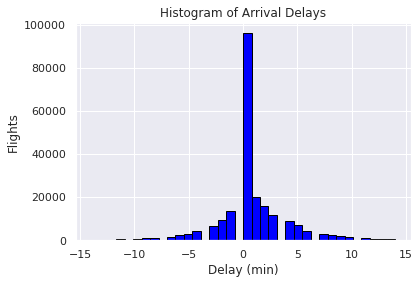

In [ ]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
seaborn.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
plt.hist(cluster_data['ArrivalDelayPrediction'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

Text(0, 0.5, 'Number of Records')

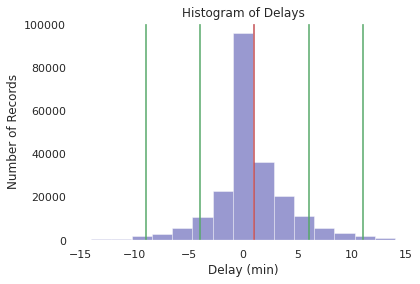

In [7]:
# seaborn histogram
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.distplot(cluster_data['ArrivalDelayPrediction'], hist=True, kde=False, 
             bins=15, color = 'darkblue')
# plt.plot([-2.8, 2.8], [0, max(cluster_data)])
plt.axvline(6.02,color='g')
plt.axvline(-3.98,color='g')
plt.axvline(11.02,color='g')
plt.axvline(-8.97,color='g')
plt.axvline(1.03,color='r')
plt.title('Histogram of Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Number of Records')

In [ ]:
from datetime import datetime
con=df['recordedAtTime']
df['recordedAtTime']=pd.to_datetime(df['recordedAtTime'])
df.set_index('recordedAtTime', inplace=True)
#check datatype of index
df.index 

In [ ]:
ts = df['ArrivalDelayPrediction']
ts.head(10)

In [ ]:
ts=ts['2020-07-01']

In [ ]:
plt.plot(ts)